In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
%matplotlib inline

In [3]:
df=pd.read_csv("C:/Users/ashis/Downloads/AEP_hourly.csv")

In [4]:
df.head(3)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [6]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


# seperate date and time

In [7]:
df["New_Date"]=pd.to_datetime(df["Datetime"]).dt.date
df["New_Time"]=pd.to_datetime(df["Datetime"]).dt.time

In [8]:
df1=df
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00


# When was the highest Energy Consuption and which Year

# Maximum

In [9]:
df1[df1["AEP_MW"]==df["AEP_MW"].max()]

,Datetime,AEP_MW,New_Date,New_Time
30221,2008-10-20 14:00:00,25695.0,2008-10-20,14:00:00


# Minimum

In [10]:
df1[df1["AEP_MW"]==df["AEP_MW"].min()]

,Datetime,AEP_MW,New_Date,New_Time
100759,2016-10-02 05:00:00,9581.0,2016-10-02,05:00:00


# Conclusion : From Step 4 we can say that Maximum Energy was Consumed during 2016-10-02 at 05:00:00 was 9581.0 MW and Minimum was on 2008-100-20 at 14:00:00 and was 25695.0 MW

# Step 5:

# Plot and Data Visualisation

<Axes: xlabel='AEP_MW', ylabel='Count'>

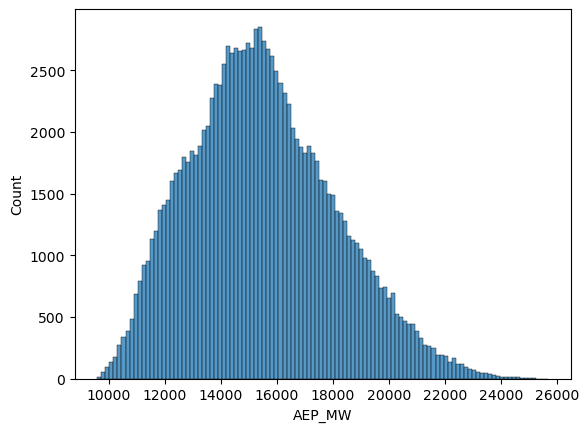

In [11]:
sns.histplot(df1["AEP_MW"])

# Step 7:Extract Datee and Time

In [12]:
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00


In [13]:
df1["Year"]=pd.DatetimeIndex(df['New_Date']).year

In [14]:
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time,Year
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004


# Check how many Years are Unique

In [15]:
df1["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

# This Tell us that there are 10 unique Year from 2004 to 2018

In [16]:
df1[df1["Year"]==2013].nunique()

Datetime    8758
AEP_MW      5601
New_Date     365
New_Time      24
Year           1
dtype: int64

# Shows the Relationship of Energy vs Year

<Axes: xlabel='Year', ylabel='AEP_MW'>

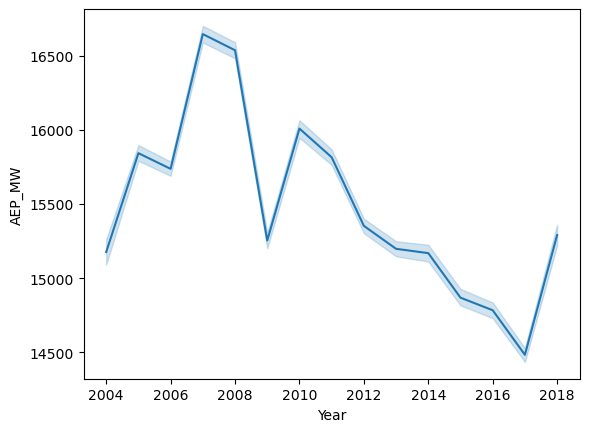

In [17]:
sns.lineplot(x=df1["Year"],y=df1["AEP_MW"], data=df1)

# Regression

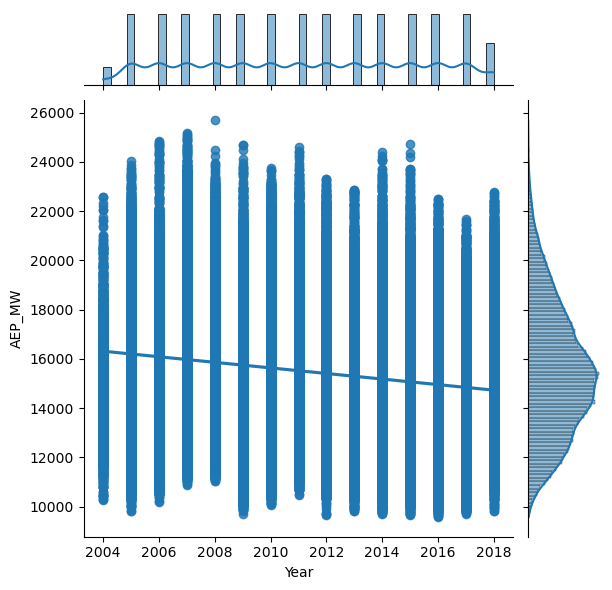

In [20]:
sns.jointplot(x=df1["Year"],y=df1["AEP_MW"],
             data=df1,
             kind="reg")

<Axes: xlabel='New_Time', ylabel='AEP_MW'>

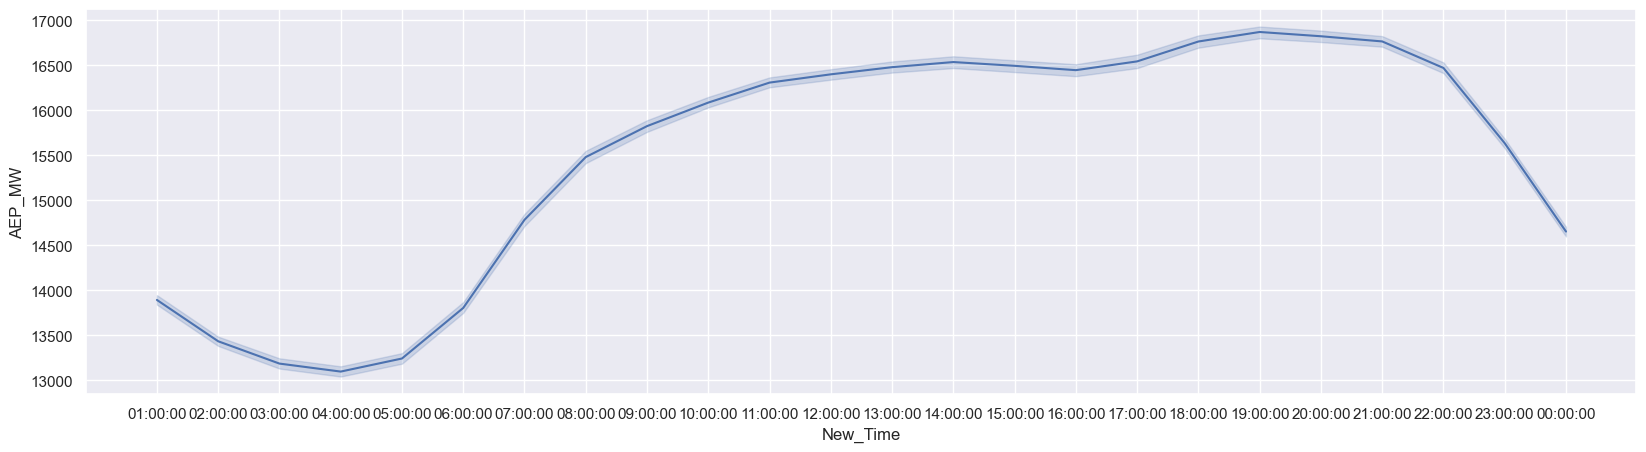

In [27]:
sns.set(rc={'figure.figsize':(20,5)})
sns.lineplot(x=df1["New_Time"],y=df1["AEP_MW"], data=df1)